# Facebook Prophet

https://facebook.github.io/prophet/docs/quick_start.html

Pre-requisites:
- pystan
- prophet

In [16]:
%pip install pystan prophet


[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [17]:
from prophet import Prophet
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

In [18]:
df = pd.read_csv('../data_sets/AirPassengers.csv')

# Prophet requires these column names:
df = df.rename(columns={'#Passengers': 'y', 'Month':'ds'})

# Save a copy of the original y to a new column
df['y_orig'] = df['y']

In [19]:
# Log transform y column
# with Prophet, no need to test for stationarity.
# however, you do need to do the log transformation
df['y'] = np.log(df['y'])

In [20]:
df.head()

,ds,y,y_orig
0,1949-01,4.718499,112
1,1949-02,4.770685,118
2,1949-03,4.882802,132
3,1949-04,4.859812,129
4,1949-05,4.795791,121


In [21]:
# Instantiate the model
model = Prophet()
model.fit(df)

# Typically you would want to do a train-test split next...

12:26:35 - cmdstanpy - INFO - Chain [1] start processing
12:26:35 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
# Future data prediction
# 12 periods, with freq M means monthly..
'''
'year' = 'A',
'quarter' = 'Q',
'month' = 'ME',
'day' = 'D',
'hour' = 'H',
'minute' = 'T',
'second' = 'S',
'millisecond' = 'L',
'microsecond' = 'U',
'nanosecond' = 'N'
'''
future_data = model.make_future_dataframe(periods=12, freq='ME')

In [24]:
forecast_data = model.predict(future_data)

In [25]:
forecast_data.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
151,1961-07-31,6.273481,6.436827,6.536095,6.260039,6.285958,0.211838,0.211838,0.211838,0.211838,0.211838,0.211838,0.0,0.0,0.0,6.485319
152,1961-08-31,6.282664,6.315345,6.412394,6.266070,6.297266,0.081763,0.081763,0.081763,0.081763,0.081763,0.081763,0.0,0.0,0.0,6.364427
153,1961-09-30,6.291552,6.153499,6.256382,6.271592,6.309057,-0.084919,-0.084919,-0.084919,-0.084919,-0.084919,-0.084919,0.0,0.0,0.0,6.206633
154,1961-10-31,6.300736,6.018585,6.124012,6.277411,6.321783,-0.228029,-0.228029,-0.228029,-0.228029,-0.228029,-0.228029,0.0,0.0,0.0,6.072707
155,1961-11-30,6.309623,6.163352,6.269006,6.282670,6.333739,-0.095194,-0.095194,-0.095194,-0.095194,-0.095194,-0.095194,0.0,0.0,0.0,6.214429


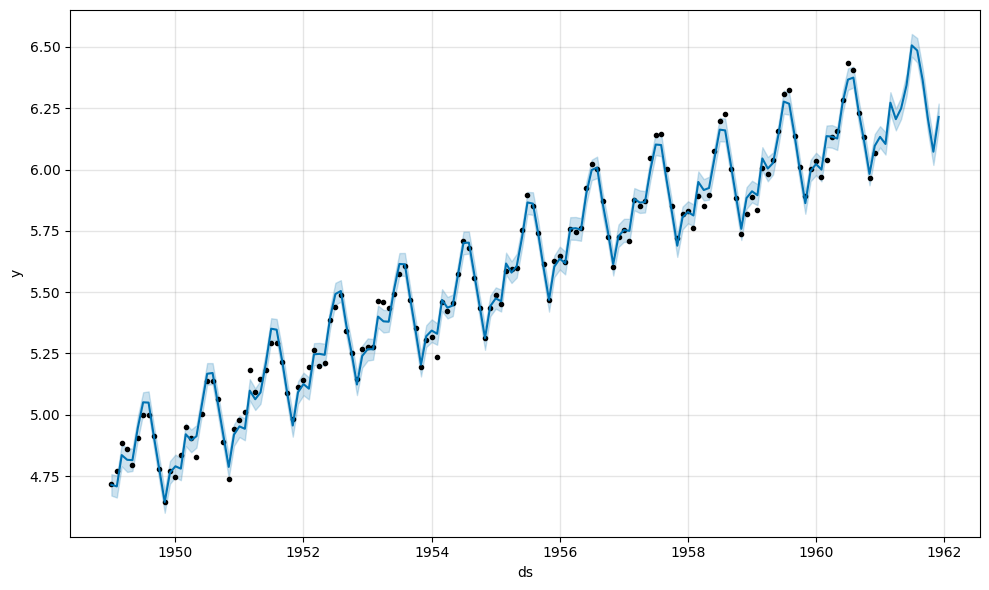

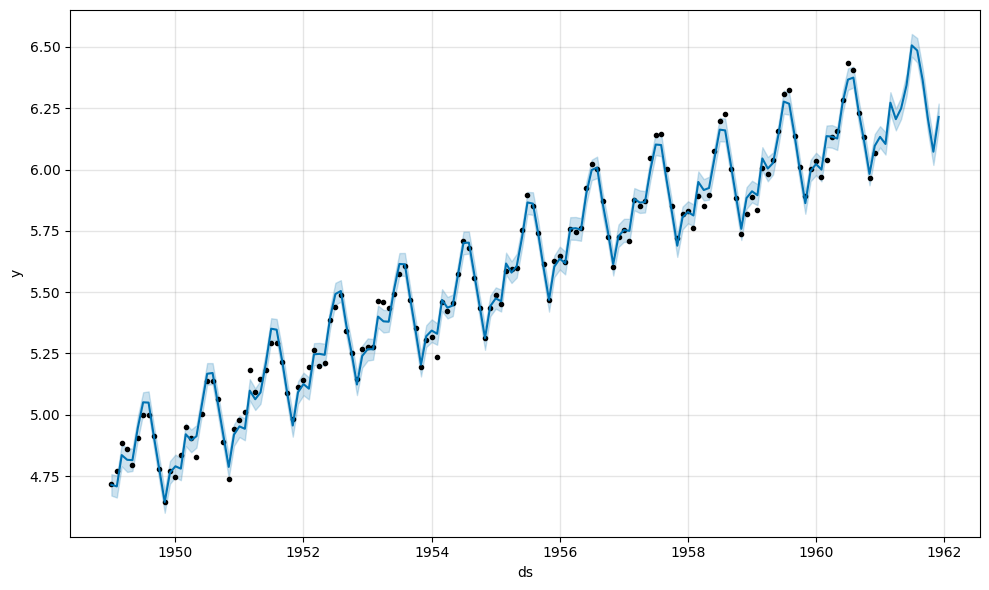

In [26]:
model.plot(forecast_data)

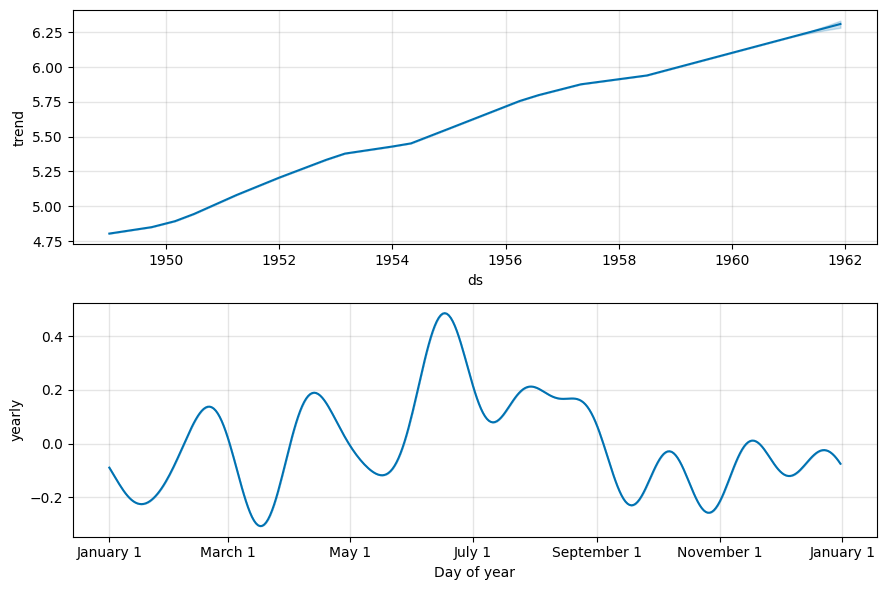

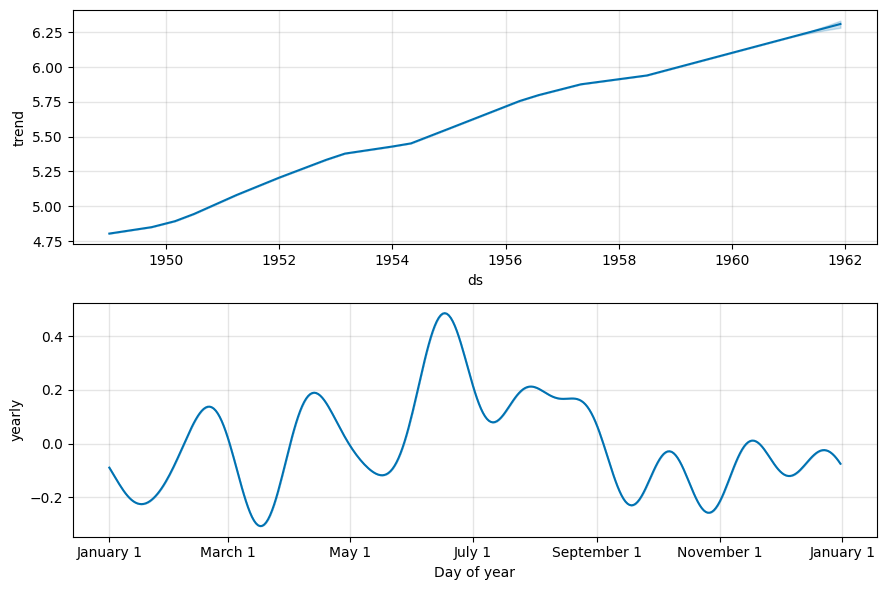

In [27]:
model.plot_components(forecast_data)

In [28]:
# Inverse Transformations

forecast_data_orig = forecast_data # make sure we save the original forecast data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])

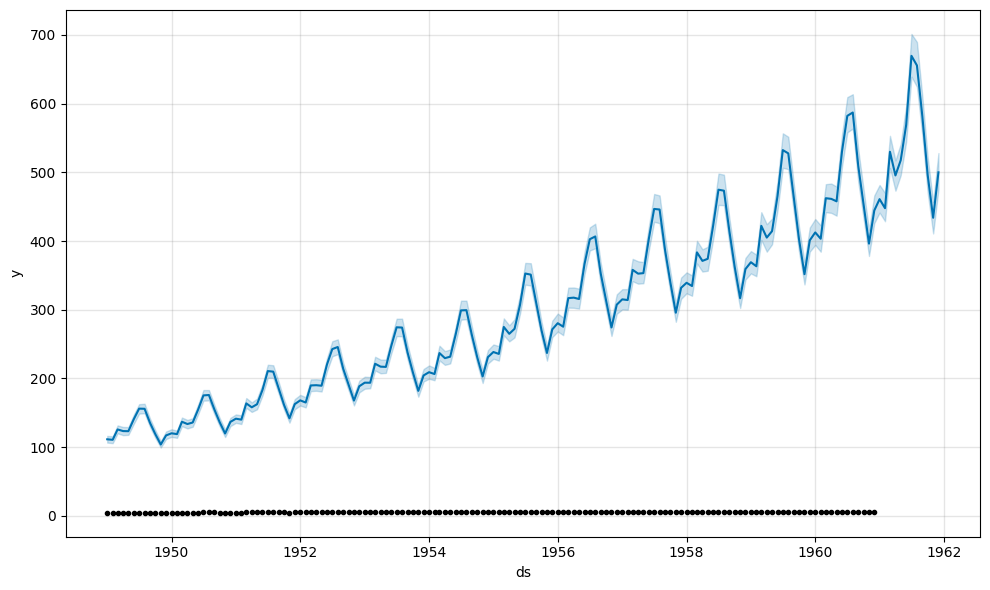

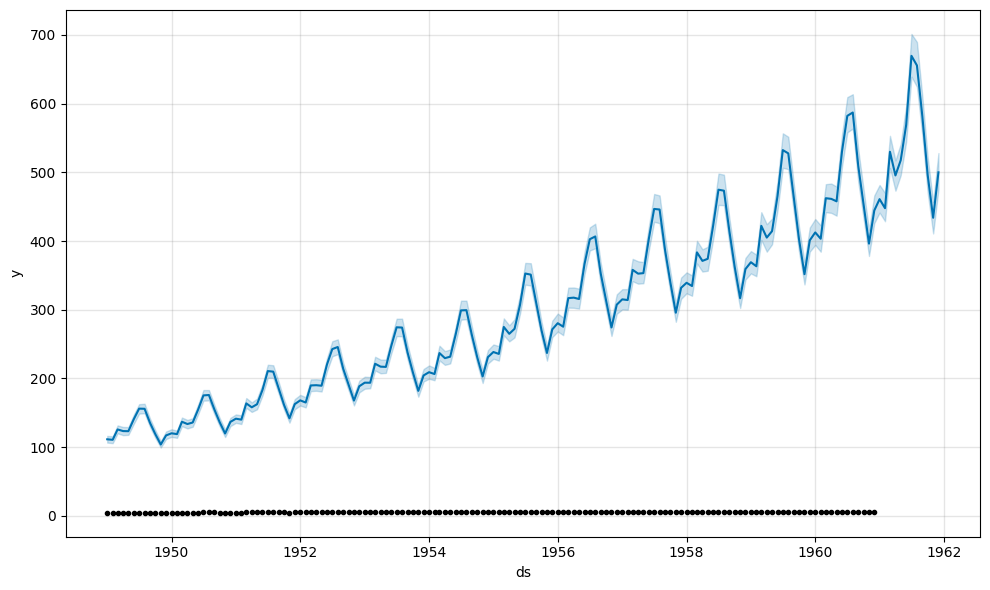

In [29]:
model.plot(forecast_data_orig)

In [31]:
# Store forecasted data into a dataframe

df['y_log'] = df['y']
df['y'] = df['y_orig']

final_df = pd.DataFrame(forecast_data_orig)

In [32]:
import plotly.graph_objects as go
import plotly.offline as py

In [33]:
# Plot predicted and actual line graph with X=dates, Y=outbound
actual_chart = go.Scatter(y=df['y_orig'], name = 'Actual')
predict_chart = go.Scatter(y=final_df['yhat'], name='Predicted')
predict_chart_upper = go.Scatter(y=final_df['yhat_upper'], name = 'Predicted Upper')
predict_chart_lower = go.Scatter(y=final_df['yhat_lower'], name = 'Predicted Lower')
py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower], image_width=400, image_height=400)

'temp-plot.html'

## Holiday Effects

If you have holidays or other recurring events that you'd like to model, you must create a dataframe for them.

In [37]:
# Built in holday methods
# model.add_country_holidays(country_name='US')

# Instantiate the model
model = Prophet()

model.add_country_holidays(country_name='US') # <---- holidays goes before .fit()

model.fit(df)

# Typically you would want to do a train-test split next...

13:42:45 - cmdstanpy - INFO - Chain [1] start processing
13:42:45 - cmdstanpy - INFO - Chain [1] done processing


In [38]:
# compare current model with holidays model

forecast_data = model.predict(future_data)

In [39]:
forecast_data.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Armistice Day,Armistice Day_lower,Armistice Day_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (observed),Christmas Day (observed)_lower,Christmas Day (observed)_upper,Columbus Day,Columbus Day_lower,Columbus Day_upper,Independence Day,Independence Day_lower,Independence Day_upper,Independence Day (observed),Independence Day (observed)_lower,Independence Day (observed)_upper,Labor Day,Labor Day_lower,Labor Day_upper,Memorial Day,Memorial Day_lower,Memorial Day_upper,New Year's Day,New Year's Day_lower,New Year's Day_upper,New Year's Day (observed),New Year's Day (observed)_lower,New Year's Day (observed)_upper,Thanksgiving Day,Thanksgiving Day_lower,Thanksgiving Day_upper,Veterans Day,Veterans Day_lower,Veterans Day_upper,Veterans Day (observed),Veterans Day (observed)_lower,Veterans Day (observed)_upper,Washington's Birthday,Washington's Birthday_lower,Washington's Birthday_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,holidays_lower,holidays_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
151,1961-07-31,509.680492,546.929285,605.143682,509.383862,509.977694,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.549378,66.549378,66.549378,0.0,0.0,0.0,66.549378,66.549378,66.549378,0.0,0.0,0.0,576.229870
152,1961-08-31,512.802952,503.066029,559.376696,512.451559,513.165671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.294955,18.294955,18.294955,0.0,0.0,0.0,18.294955,18.294955,18.294955,0.0,0.0,0.0,531.097907
153,1961-09-30,515.824688,464.586236,522.316537,515.412803,516.254944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-22.653041,-22.653041,-22.653041,0.0,0.0,0.0,-22.653041,-22.653041,-22.653041,0.0,0.0,0.0,493.171646
154,1961-10-31,518.947148,434.622823,492.385025,518.469708,519.451507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-55.643918,-55.643918,-55.643918,0.0,0.0,0.0,-55.643918,-55.643918,-55.643918,0.0,0.0,0.0,463.303230
155,1961-11-30,521.968884,464.663009,520.201517,521.432483,522.554171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-29.115346,-29.115346,-29.115346,0.0,0.0,0.0,-29.115346,-29.115346,-29.115346,0.0,0.0,0.0,492.853538
